# Clustering

In this notebook we investigate how different clustering algorithms work and test their performance in different data distributions. The notebook is done to explore clustering algorithms using the textbook "Data Mining Concepts and Techniques".

Clustering is an unsupervised learning method that does not build on previously assigned data labels. The goal is rather to identify these classes in the first place.
There are multiple methods to categorize data:

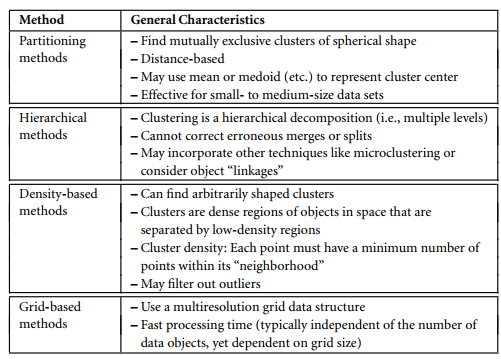
Reference: Data Mining Concepts and Techniques, p. 450

Clustering is useful to better understand data or to compress many data points into single cluster prototypes.


In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


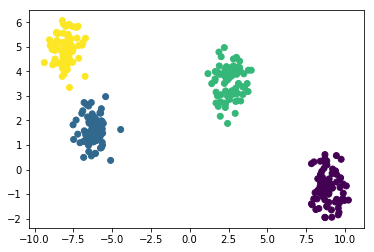

In [11]:
#create cluster
n_samples = 300 # number of data points

X, y = make_blobs(n_samples=n_samples,
                  centers=4,
                  cluster_std=0.6,
                  random_state=37)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### 1) KMeans

KMeans clustering aims to divide a set of data points into K clusters. Each cluster is defined by the centre and the algorithm assigns for each input data point the closest cluster with a distance metric such as a Euclidean distance:

$$ d(p,q) = \sqrt{\sum \limits _{i=1} ^{n}(p_i-q_i)^2} $$

The process is then iterated until convergence (i.e. until the clusters do not change after an iteration).

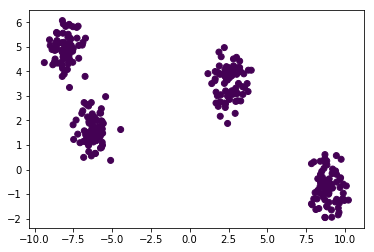

[[75]
 [75]
 [75]
 [75]]


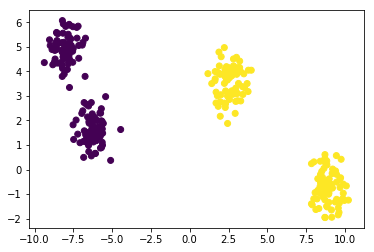

[[ 0 75]
 [75  0]
 [ 0 75]
 [75  0]]


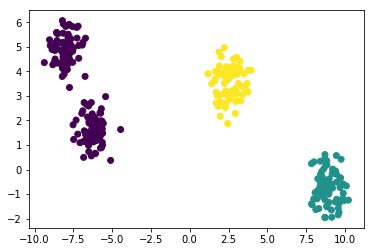

[[ 0 75  0]
 [75  0  0]
 [ 0  0 75]
 [75  0  0]]


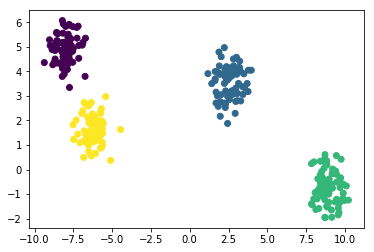

[[ 0  0 75  0]
 [ 0  0  0 75]
 [ 0 75  0  0]
 [75  0  0  0]]


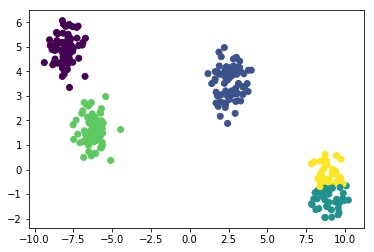

[[ 0  0 40  0 35]
 [ 0  0  0 75  0]
 [ 0 75  0  0  0]
 [75  0  0  0  0]]


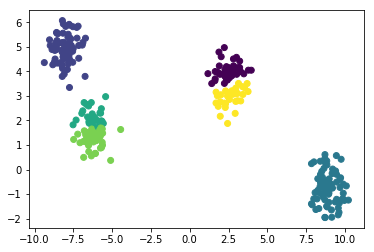

[[ 0  0 75  0  0  0]
 [ 0  0  0 28 47  0]
 [43  0  0  0  0 32]
 [ 0 75  0  0  0  0]]


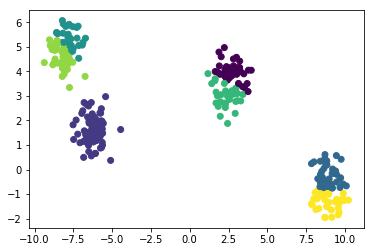

[[ 0  0 41  0  0  0 34]
 [ 0 75  0  0  0  0  0]
 [43  0  0  0 32  0  0]
 [ 0  0  0 36  0 39  0]]


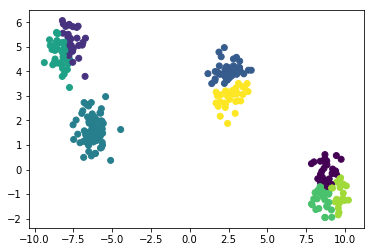

[[31  0  0  0  0 25 19  0]
 [ 0  0  0 75  0  0  0  0]
 [ 0  0 43  0  0  0  0 32]
 [ 0 34  0  0 41  0  0  0]]


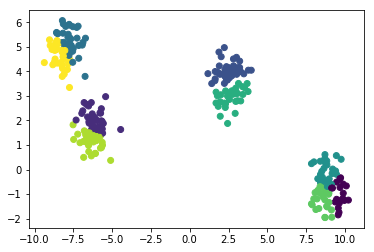

[[19  0  0  0 31  0 25  0  0]
 [ 0 36  0  0  0  0  0 39  0]
 [ 0  0 43  0  0 32  0  0  0]
 [ 0  0  0 41  0  0  0  0 34]]


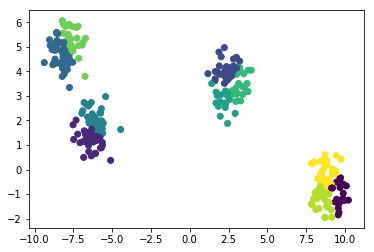

[[19  0  0  0  0  0  0  0 25 31]
 [ 0 41  0  0 34  0  0  0  0  0]
 [ 0  0 35  0  0 17 23  0  0  0]
 [ 0  0  0 44  0  0  0 31  0  0]]


In [41]:
k = np.arange(10)+1 # cluster

for i in k: # apply k different kmean-models with different k
    y_pred = KMeans(n_clusters=i, random_state=37).fit_predict(X)
    plt.scatter(X[:,0], X[:,1], c=y_pred)
    plt.show()
    print(contingency_matrix(labels_true=y, labels_pred=y_pred))

How many clusters should we eventually use if we do not know the initial classes?
To answer this question we can evaluate the SSE and 
plot the elbow curve for the KMean-models.

In [44]:
def draw_elbow_curve(X, y, K):
    sse = {}
    for i in k:
        kmeans = KMeans(n_clusters=i, random_state=37).fit(X)
        sse[i] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel('number of cluster')
    plt.ylabel('SSE')
 
    return plt.show()


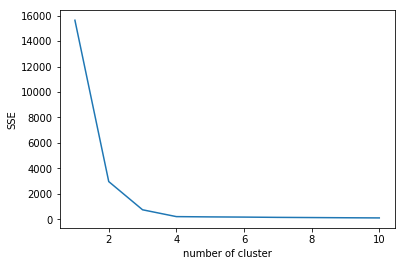

In [45]:
draw_elbow_curve(X, y, k)

If we want to compare two different models we can now see that the SSE is sharply declining and flattens after 4 clusters. We can interpret the SSE in this context as degree of scatter. Thus, lower levels indicate lower distances between clusters.

### What happens when data overlaps?

Let's consider the example when clusters are not as clearly seperated and the data is sparse.

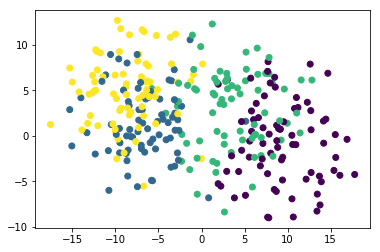

In [46]:
#create cluster

X, y = make_blobs(n_samples=n_samples,
                  centers=4,
                  cluster_std=4,
                  random_state=37)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

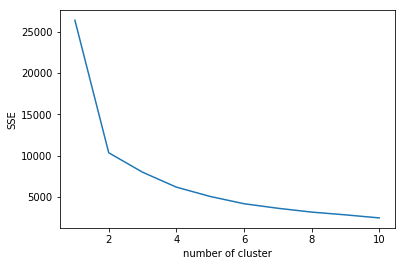

In [47]:
# How many clusters are suggested by SSE?
draw_elbow_curve(X, y, k)

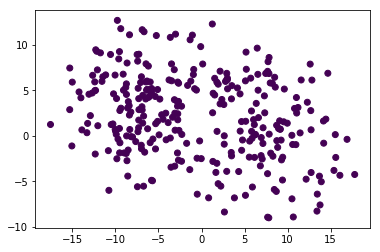

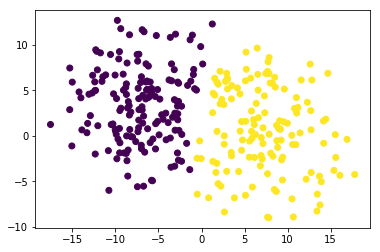

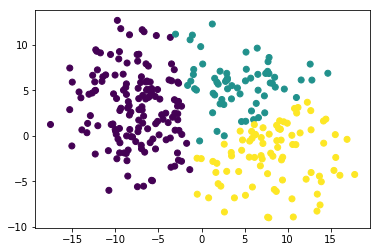

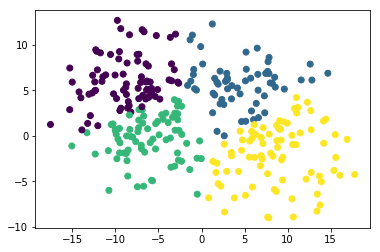

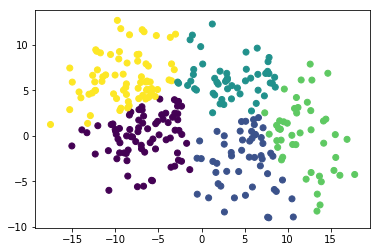

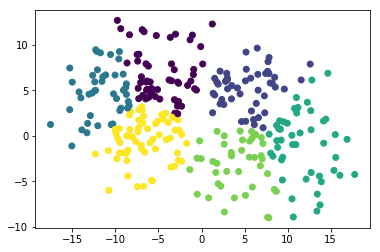

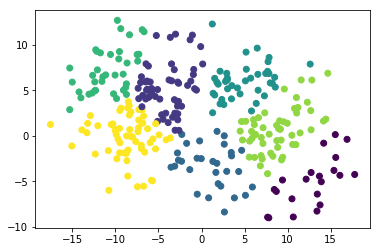

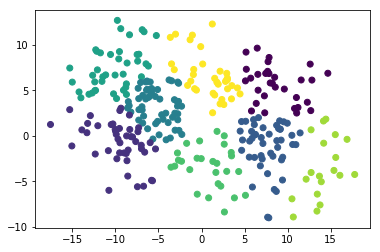

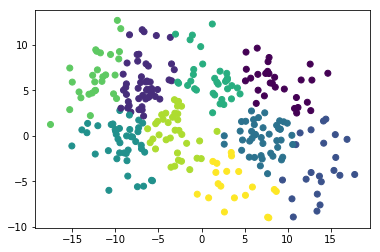

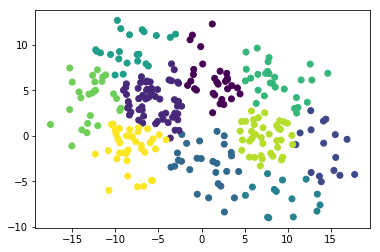

In [48]:
for i in k:
    y_pred = KMeans(n_clusters=i, random_state=37).fit_predict(X)
    plt.scatter(X[:,0], X[:,1], c=y_pred)
    plt.show()

### Takeaways: 
The high standard deviation spreads the observation in a larger area. Hence the KMeans algorithm might be not suited to identify meaningful clusters if the data has large spread. Likewise, in high-dimensional space the euclidean distance might become less meaningful (distances approach uniformly 1 here, see https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions for an excellent discussion and literature recommendations on this topic). 

To deal with larger datasets "Clustering Large Applications" (CLARA) could be used. Here instead of taking the whole dataset, the algorithm uses random subsamples. This method is beyond the scope of this initial comparison of algorithms and I might do a separate notebook on it.

### 2) Density-based 

Data which is not sperical-shaped is difficult to cluser with the K-Means algorithm previously described.
Thus, the algorithm would likely struggle with arbitrarily shaped data clusters such as the chameleon shape used in this example.

Density-based algortihm offer an alternative method to classify these datasets. The methods search the data space to identify regions with high density.
DBSCAN measures the number of objects close to object o. This is different from distance measurements as here the data must be located in a certain neighborhood to form a cluster. The neighborhood is defined by a hyperparameter e > 0 which specifies the radius around an object.
The neighborhood of an object is the space within radius e centered at o. Hence, the density can be determined by counting the number of objects within a neighborhood.
To judge wether an neighborhood is dense in the first place, another hyperparameter MinPts, that sets the density threshold of regions, is specified.

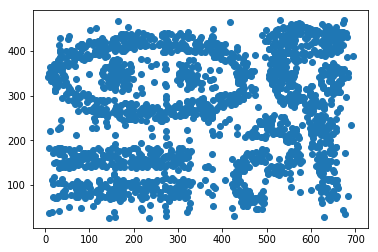

In [4]:
cham = pd.read_csv('chameleon.csv')
plt.scatter(cham['x'],cham['y'])
plt.show()

The "chameleon" data shows distinct data clusters which are easily observable for humans. However distance or hierachical clustering algorithms perform poorly.

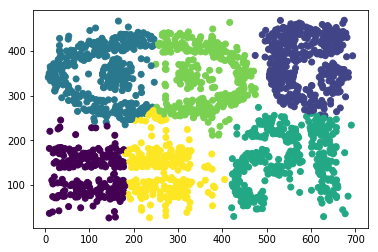

In [15]:
# kmeans with 6 cluster

y_pred = KMeans(n_clusters=6, random_state=37).fit_predict(cham)
plt.scatter(cham['x'],cham['y'], c=y_pred)
plt.show()

Applying DBSCAN can help identiyfing the arbitrary data patterns better

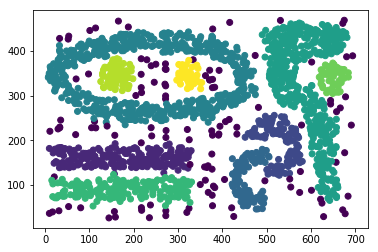

In [25]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=15.5, min_samples=5)
dbs_pred = DBSCAN.fit_predict(dbs, cham)
plt.scatter(cham['x'],cham['y'],c=dbs_pred)
plt.show()

### Outlook to High-dimensional data

In high dimensional space distance measures become less meaningful due to noise in the many dimensions.
Thus, to cluster data in this space, we need to identify not only the clusters but also the dimensionality in which we want to apply clustering.

There exist two major methods:
- 1) Subspace clustering approaches search for clusters in a subspace of the high-dimensional data space.

- 2) Dimensionality reduction approaches construct a much lower-dimensional space and search for clusters in the reduced space. These methods may construct new dimensions by combining dimensions from the original data.

### Example 1: Correlation-Based Clustering

Correlation based approaches discover structures based on a correlation model of the data.

Principal component analysis (PCA) is one of the approaches which can be used to derive a set of new, uncorrelated dimensions.


### Example 2: Biclustering

In some applications, objects and attributes are defined in a symmetric way. I.e. data matrices for submatrices show unique patterns as clusters. This technique belongs to biclustering.

Biclustering techniques were first introduced in gene expression data. From clustering perspective the data in genes can be analyzed in two dimensions:
- 1) The gene dimension: each gene is treated as an object and the observed conditions as attributes
- 2) Sample/condition dimension: each sample/condition is treated as an object and observed genes as attributes

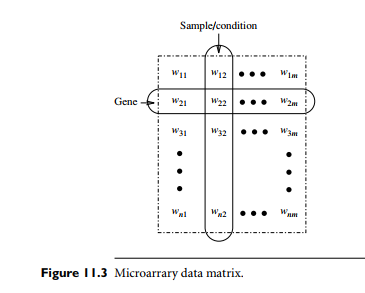
Reference: Data Mining Concepts and Techniques, p. 513

Biclustering is not only useful in bioinformatics, but can also be applied in, for instance, recommender systems.

Customer-Product matrices can be analyzed in a customer dimension and an product dimension. Thus, we can find customer groups that have similar preferences or purchase patterns. Using products as objects, we can find product groups that attract similar customer interests. Therefore, we could make predictions in two directions: 1) we can recommend products to new customers who are similar to customers in the cluster. 2) we can recommend customers new products that are similar to those included in the cluster. 

